<a href="https://colab.research.google.com/github/maxfraid/compmathsystem/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%9610_%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B8_%D0%BF%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D1%80%D1%8F%D0%B4%D0%BE%D0%B2_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №10. Визуализация, анализ и прогнозирование временных рядов

# Блок №1. Теория

## 1. Регистрация и получение API ключа


Перед началом работы с API OpenWeatherMap, вам необходимо зарегистрироваться на сайте OpenWeatherMap и получить API ключ. Этот ключ будет использоваться для аутентификации ваших запросов к API.

In [ ]:
import json

with open("key.json") as f:
    data = json.load(f)

API_KEY = data['key']

## 2. Установка необходимых библиотек


Убедитесь, что у вас установлены следующие библиотеки:
```python
pip install requests pandas plotly scikit-learn
```

*(установлены по умолчанию в colab)*

## 3. Получение и обработка данных о погоде
Следующий код демонстрирует, как получить данные о погоде для списка городов и стран:



In [ ]:
import requests  # Импорт библиотеки requests для отправки HTTP-запросов
import pandas as pd  # Импорт библиотеки pandas для обработки и анализа данных

locations = ["Paris,FR", "Berlin,DE", "Moscow,RU"]  # Список мест, для которых вы хотите получить данные о погоде

weather_data_list = []  # Пустой список для хранения данных о погоде

# Цикл по всем местам в списке locations
for location in locations:
    city, country = location.split(',')  # Разделение строки на город и страну
    # Формирование URL для запроса геокодирования
    geocode_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city},{country}&limit=1&appid={API_KEY}"
    geocode_response = requests.get(geocode_url).json()  # Отправка запроса и получение ответа в формате JSON
    # Если ответ не пустой
    if geocode_response:
        latitude = geocode_response[0]['lat']  # Получение широты из ответа
        longitude = geocode_response[0]['lon']  # Получение долготы из ответа
        # Формирование URL для запроса прогноза погоды
        forecast_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={latitude}&lon={longitude}&appid={API_KEY}"
        forecast_data = requests.get(forecast_url).json()['list']  # Отправка запроса и получение данных прогноза
        # Цикл по всем записям в данных прогноза
        for entry in forecast_data:
            # Добавление данных о погоде в список
            weather_data_list.append({
                "city": city,
                "country": country,
                "latitude": latitude,
                "longitude": longitude,
                "datetime": entry['dt_txt'],
                "temperature": entry["main"]["temp"] - 273.15,  # Преобразование температуры из Кельвинов в градусы Цельсия
                "humidity": entry["main"]["humidity"],  # Влажность
                "description": entry["weather"][0]["description"]  # Описание погоды
            })

# Преобразование списка в DataFrame
weather_data = pd.DataFrame(weather_data_list)
# Преобразование строки с датой и временем в объект datetime
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])


In [ ]:
weather_data

,city,country,latitude,longitude,datetime,temperature,humidity,description
0,Paris,FR,48.858890,2.320041,2024-05-06 15:00:00,17.03,52,light rain
1,Paris,FR,48.858890,2.320041,2024-05-06 18:00:00,15.44,67,light rain
2,Paris,FR,48.858890,2.320041,2024-05-06 21:00:00,12.06,90,light rain
3,Paris,FR,48.858890,2.320041,2024-05-07 00:00:00,10.70,95,broken clouds
4,Paris,FR,48.858890,2.320041,2024-05-07 03:00:00,9.90,96,broken clouds
...,...,...,...,...,...,...,...,...
115,Moscow,RU,55.750446,37.617494,2024-05-11 00:00:00,5.90,83,light rain
116,Moscow,RU,55.750446,37.617494,2024-05-11 03:00:00,4.15,85,few clouds
117,Moscow,RU,55.750446,37.617494,2024-05-11 06:00:00,8.09,56,scattered clouds
118,Moscow,RU,55.750446,37.617494,2024-05-11 09:00:00,11.26,33,light rain


## 4. Визуализация данных
Для визуализации данных о погоде на карте мы можем использовать библиотеку Plotly:


In [ ]:
import plotly.express as px  # Импорт модуля plotly.express для создания интерактивных графиков

# Создание диаграммы рассеяния на карте с использованием данных о погоде
fig = px.scatter_mapbox(weather_data,  # Данные для графика
                        lat="latitude",  # Колонка в данных, которая будет использоваться для широты точек на карте
                        lon="longitude",  # Колонка в данных, которая будет использоваться для долготы точек на карте
                        color="temperature",  # Колонка в данных, которая будет использоваться для цвета точек
                        size="humidity",  # Колонка в данных, которая будет использоваться для размера точек
                        hover_name="city",  # Колонка в данных, которая будет отображаться при наведении на точку
                        hover_data=["description"],  # Дополнительные данные, которые будут отображаться при наведении на точку
                        # Создание анимации по времени. Время преобразуется в строку для корректного отображения
                        animation_frame=weather_data['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S'),
                        center={"lat": 50, "lon": 14},  # Центр карты при открытии
                        zoom=3,  # Уровень приближения карты при открытии
                        mapbox_style="carto-positron",  # Стиль карты
                        title="Weather Forecast")  # Заголовок графика

fig.show()  # Отображение графика


In [ ]:
import requests
import pandas as pd
import plotly.express as px

# Список городов и стран для запроса
locations = [
    {"city": "New York", "country": "US"},
    # Добавьте другие города и страны по вашему выбору
]

# Запрос данных о погоде
weather_data = []
for loc in locations:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={loc['city']},{loc['country']}&appid={API_KEY}"
    response = requests.get(url)
    data = response.json()
    weather_data.append({
        "city": loc["city"],
        "country": loc["country"],
        "temperature": data["main"]["temp"] - 273.15,  # Кельвины в Цельсии
    })

# Создание DataFrame
df = pd.DataFrame(weather_data)

# Визуализация на тематической карте
fig = px.choropleth(
    df,
    locations="country",
    locationmode="country names",
    color="temperature",
    hover_name="city",
    title="Температура в разных городах",
    color_continuous_scale="Viridis",
)

fig.show()


# Блок 2. Анализ данных

### Задание №1. Получите прогноз погоды на 5 дней по любым 4 городам

In [ ]:
import time

# Список городов и стран для запроса
locations = [
    {"city": "Moscow", "country": "RU"},
    {"city": "Saint Petersburg", "country": "RU"},
    {"city": "Vladivostok", "country": "RU"},
    {"city": "Voronezh", "country": "RU"}
]

# Запрос данных о погоде
weather_data = []

# Цикл по всем местам в списке locations
for location in locations:
    city, country = location.values()

    # Формирование URL для запроса геокодирования
    geocode_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city},{country}&limit=1&appid={API_KEY}"
    geocode_response = requests.get(geocode_url).json()  # Отправка запроса и получение ответа в формате JSON

    # Если ответ не пустой
    if geocode_response:
        latitude = geocode_response[0]['lat']  # Получение широты из ответа
        longitude = geocode_response[0]['lon']  # Получение долготы из ответа

        # Формирование URL для запроса прогноза погоды
        forecast_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={latitude}&lon={longitude}&appid={API_KEY}"
        forecast_data = requests.get(forecast_url).json()['list']  # Отправка запроса и получение данных прогноза

        # Цикл по всем записям в данных прогноза
        for entry in forecast_data:
            # Добавление данных о погоде в список
            weather_data.append({
                "city": city,
                "country": country,
                "latitude": latitude,
                "longitude": longitude,
                "datetime": entry['dt_txt'],
                "temperature": entry["main"]["temp"] - 273.15,  # Преобразование температуры из Кельвинов в градусы Цельсия
                "humidity": entry["main"]["humidity"],  # Влажность
                "description": entry["weather"][0]["description"]  # Описание погоды
            })

# Создание DataFrame
df = pd.DataFrame(weather_data)

df['datetime'] = pd.to_datetime(df['datetime'], format=r'%Y-%m-%d %H:%M:%S')
df

,city,country,latitude,longitude,datetime,temperature,humidity,description
0,Moscow,RU,55.750446,37.617494,2024-05-06 18:00:00,7.87,49,overcast clouds
1,Moscow,RU,55.750446,37.617494,2024-05-06 21:00:00,6.74,52,overcast clouds
2,Moscow,RU,55.750446,37.617494,2024-05-07 00:00:00,5.08,55,overcast clouds
3,Moscow,RU,55.750446,37.617494,2024-05-07 03:00:00,3.55,65,overcast clouds
4,Moscow,RU,55.750446,37.617494,2024-05-07 06:00:00,4.66,59,light rain
...,...,...,...,...,...,...,...,...
155,Voronezh,RU,51.660598,39.200586,2024-05-11 03:00:00,7.13,61,overcast clouds
156,Voronezh,RU,51.660598,39.200586,2024-05-11 06:00:00,11.49,49,overcast clouds
157,Voronezh,RU,51.660598,39.200586,2024-05-11 09:00:00,14.96,48,overcast clouds
158,Voronezh,RU,51.660598,39.200586,2024-05-11 12:00:00,13.91,61,light rain


### Задание №2. Вычислите общее среднее значение и стандартное отклонение температуры по всем городам

In [ ]:
averages = {
    'Moscow': df[df['city'] == 'Moscow']['temperature'].mean(),
    'Saint Petersburg': df[df['city'] == 'Saint Petersburg']['temperature'].mean(),
    'Vladivostok': df[df['city'] == 'Vladivostok']['temperature'].mean(),
    'Voronezh': df[df['city'] == 'Voronezh']['temperature'].mean(),
}

means = {
    'Moscow': df[df['city'] == 'Moscow']['temperature'].std(),
    'Saint Petersburg': df[df['city'] == 'Saint Petersburg']['temperature'].std(),
    'Vladivostok': df[df['city'] == 'Vladivostok']['temperature'].std(),
    'Voronezh': df[df['city'] == 'Voronezh']['temperature'].std(),
}

print(averages)
print(means)

{'Moscow': 5.566000000000021, 'Saint Petersburg': 3.1372500000000216, 'Vladivostok': 8.528000000000022, 'Voronezh': 9.886500000000025}
{'Moscow': 3.1631490314039654, 'Saint Petersburg': 3.1422521626766553, 'Vladivostok': 1.4670783804415441, 'Voronezh': 4.733565117112969}


### Задание №3. Визуализируйте распределения температуры по дням. Отдельно по каждому городу (На одной плоскости должно быть четыре графика)


##### Пример визуализации по одному городу:

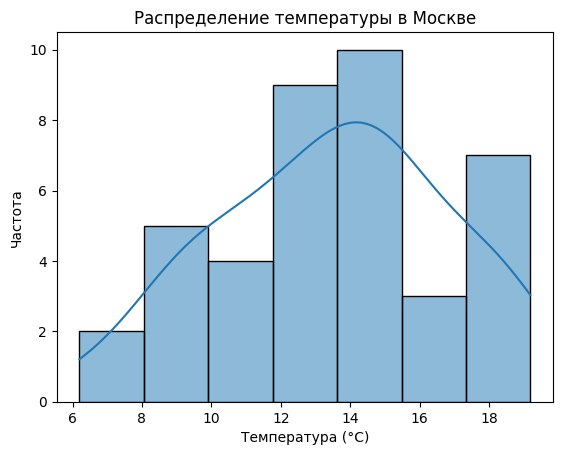

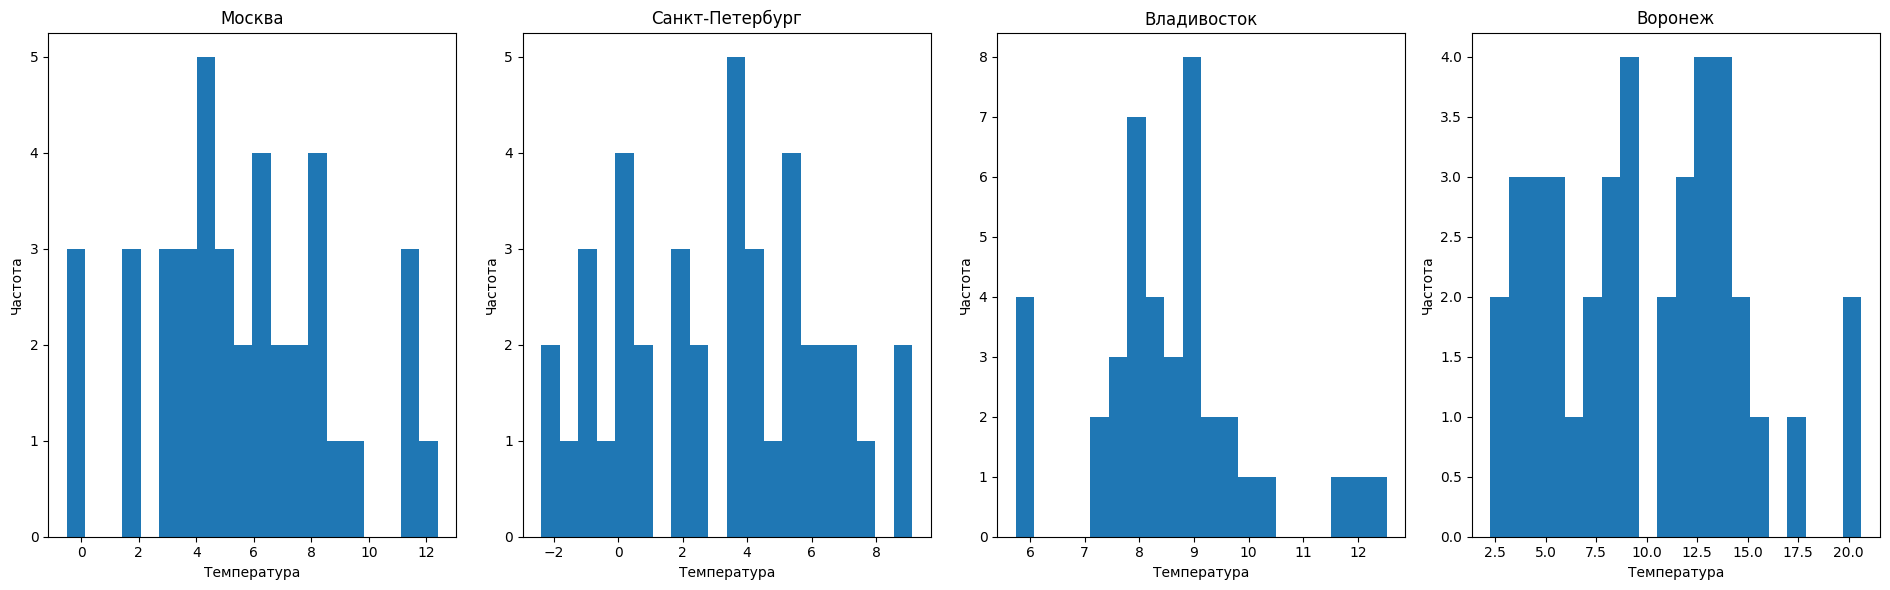

In [ ]:
import matplotlib.pyplot as plt

# Преобразуем данные в удобный формат
moscow = df[df['city'] == 'Moscow']
saint_petersburg = df[df['city'] == 'Saint Petersburg']
vladivostok = df[df['city'] == 'Vladivostok']
voronezh = df[df['city'] == 'Voronezh']

fig, ax = plt.subplots(1, 4, figsize=(19, 6))

moscow.temperature.plot(ax=ax[0], kind='hist', bins=20, title="Москва", xlabel="Температура", ylabel="Частота")
saint_petersburg.temperature.plot(ax=ax[1], kind='hist', bins=20, title="Санкт-Петербург", xlabel="Температура", ylabel="Частота")
vladivostok.temperature.plot(ax=ax[2], kind='hist', bins=20, title="Владивосток", xlabel="Температура", ylabel="Частота")
voronezh.temperature.plot(ax=ax[3], kind='hist', bins=20, title="Воронеж", xlabel="Температура", ylabel="Частота")

plt.tight_layout()
plt.show()

### Задание №4. Визуализируйте Корреляционну матрицу. Отдельно по каждому городу (На одной плоскости должно быть четыре графика). Затем общую корреляционную матрицу по всем данным из набора.


##### Пример визуализации по одному городу:

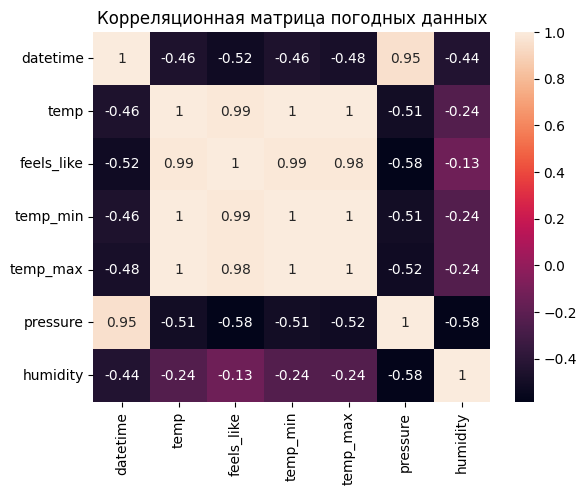

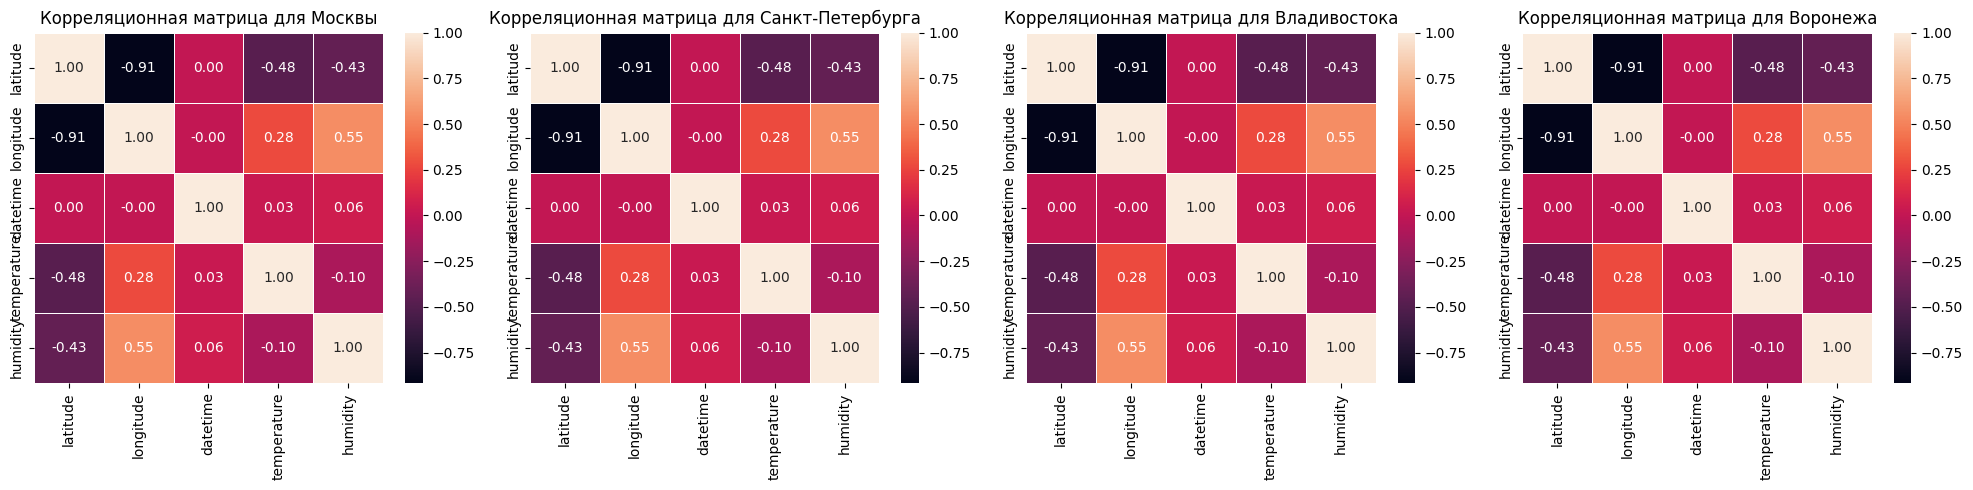

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем датафреймы для каждого города
moscow = df[df['city'] == 'Moscow']
moscow = df.drop(['city', 'country', 'description'], axis=1)

saint_petersburg = df[df['city'] == 'Saint Petersburg']
saint_petersburg = df.drop(['city', 'country', 'description'], axis=1)

vladivostok = df[df['city'] == 'Vladivostok']
vladivostok = df.drop(['city', 'country', 'description'], axis=1)

voronezh = df[df['city'] == 'Voronezh']
voronezh = df.drop(['city', 'country', 'description'], axis=1)

# Создаем общую корреляционную матрицу для всех городов
correlation_matrices = [moscow.corr(), saint_petersburg.corr(), vladivostok.corr(), voronezh.corr()]

# Создаем общую фигуру для всех графиков
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

cities = ['Москвы', 'Санкт-Петербурга', 'Владивостока', 'Воронежа']

# Отображаем корреляционные матрицы для каждого города
for i, city_corr in enumerate(correlation_matrices):
    sns.heatmap(city_corr, annot=True, fmt=".2f", linewidths=0.5, ax=axes[i])
    axes[i].set_title(f'Корреляционная матрица для {cities[i]}')

plt.tight_layout()
plt.show()

### Задание №5. Визуализируйте тренд изменения температуры со временем. Отдельно по каждому городу (На одной плоскости должно быть четыре графика).

##### Пример визуализации по одному городу:

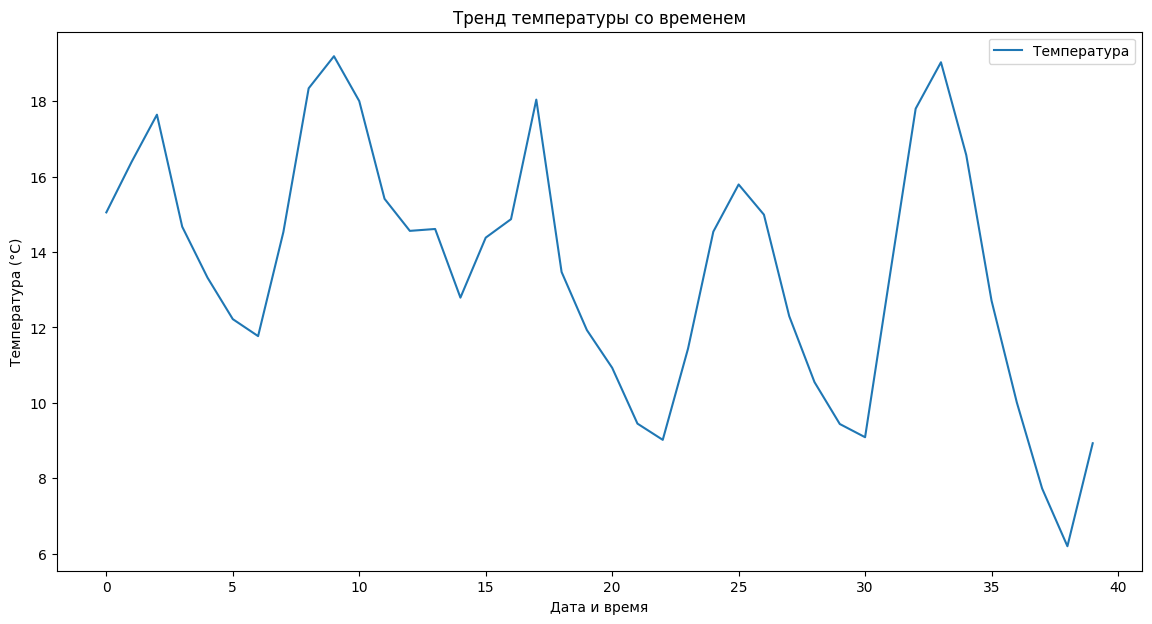

In [ ]:
df.set_index('datetime', inplace = True)
df.index = pd.to_datetime(df.index)
display(df)

,city,country,latitude,longitude,temperature,humidity,description
datetime,,,,,,,
2024-05-06 18:00:00,Moscow,RU,55.750446,37.617494,7.87,49,overcast clouds
2024-05-06 21:00:00,Moscow,RU,55.750446,37.617494,6.74,52,overcast clouds
2024-05-07 00:00:00,Moscow,RU,55.750446,37.617494,5.08,55,overcast clouds
2024-05-07 03:00:00,Moscow,RU,55.750446,37.617494,3.55,65,overcast clouds
2024-05-07 06:00:00,Moscow,RU,55.750446,37.617494,4.66,59,light rain
...,...,...,...,...,...,...,...
2024-05-11 03:00:00,Voronezh,RU,51.660598,39.200586,7.13,61,overcast clouds
2024-05-11 06:00:00,Voronezh,RU,51.660598,39.200586,11.49,49,overcast clouds
2024-05-11 09:00:00,Voronezh,RU,51.660598,39.200586,14.96,48,overcast clouds


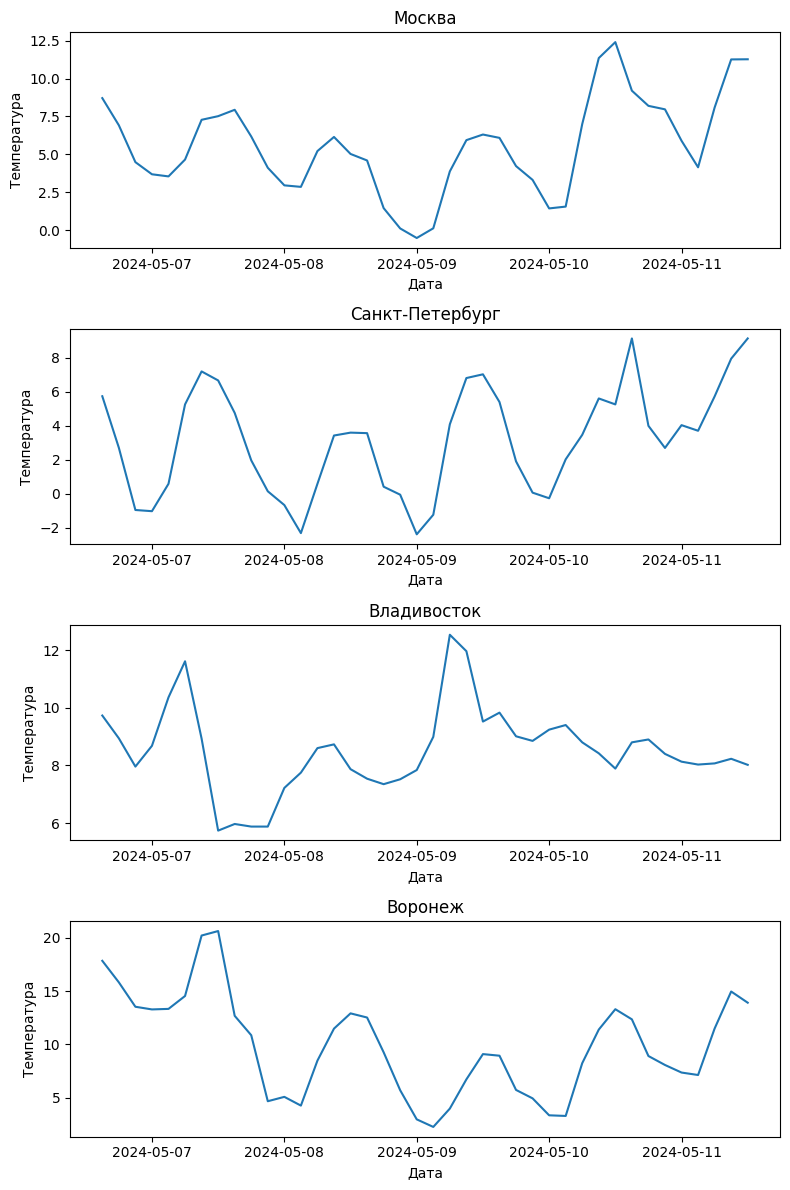

In [ ]:
moscow = df[df['city'] == 'Moscow']
saint_petersburg = df[df['city'] == 'Saint Petersburg']
vladivostok = df[df['city'] == 'Vladivostok']
voronezh = df[df['city'] == 'Voronezh']

fig, ax = plt.subplots(4, figsize = (8, 12))
ax[0].plot(moscow.index, moscow['temperature'])
ax[0].set_title('Москва')
ax[0].set_xlabel('Дата')
ax[0].set_ylabel('Температура')

ax[1].plot(saint_petersburg.index, saint_petersburg['temperature'])
ax[1].set_title('Санкт-Петербург')
ax[1].set_xlabel('Дата')
ax[1].set_ylabel('Температура')

ax[2].plot(vladivostok.index, vladivostok['temperature'])
ax[2].set_title('Владивосток')
ax[2].set_xlabel('Дата')
ax[2].set_ylabel('Температура')

ax[3].plot(voronezh.index, voronezh['temperature'])
ax[3].set_title('Воронеж')
ax[3].set_xlabel('Дата')
ax[3].set_ylabel('Температура')

fig.tight_layout()
plt.show()

### Задание №6.1. Отобразите среднюю дневную (с 04:00 до 23:00) температуру для каждого города (На одной плоскости должно быть четыре графика):

##### Пример визуализации по одному городу:

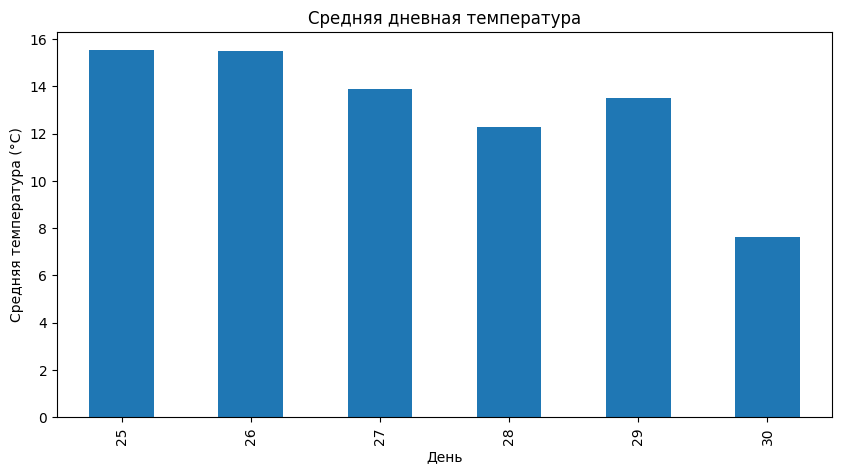

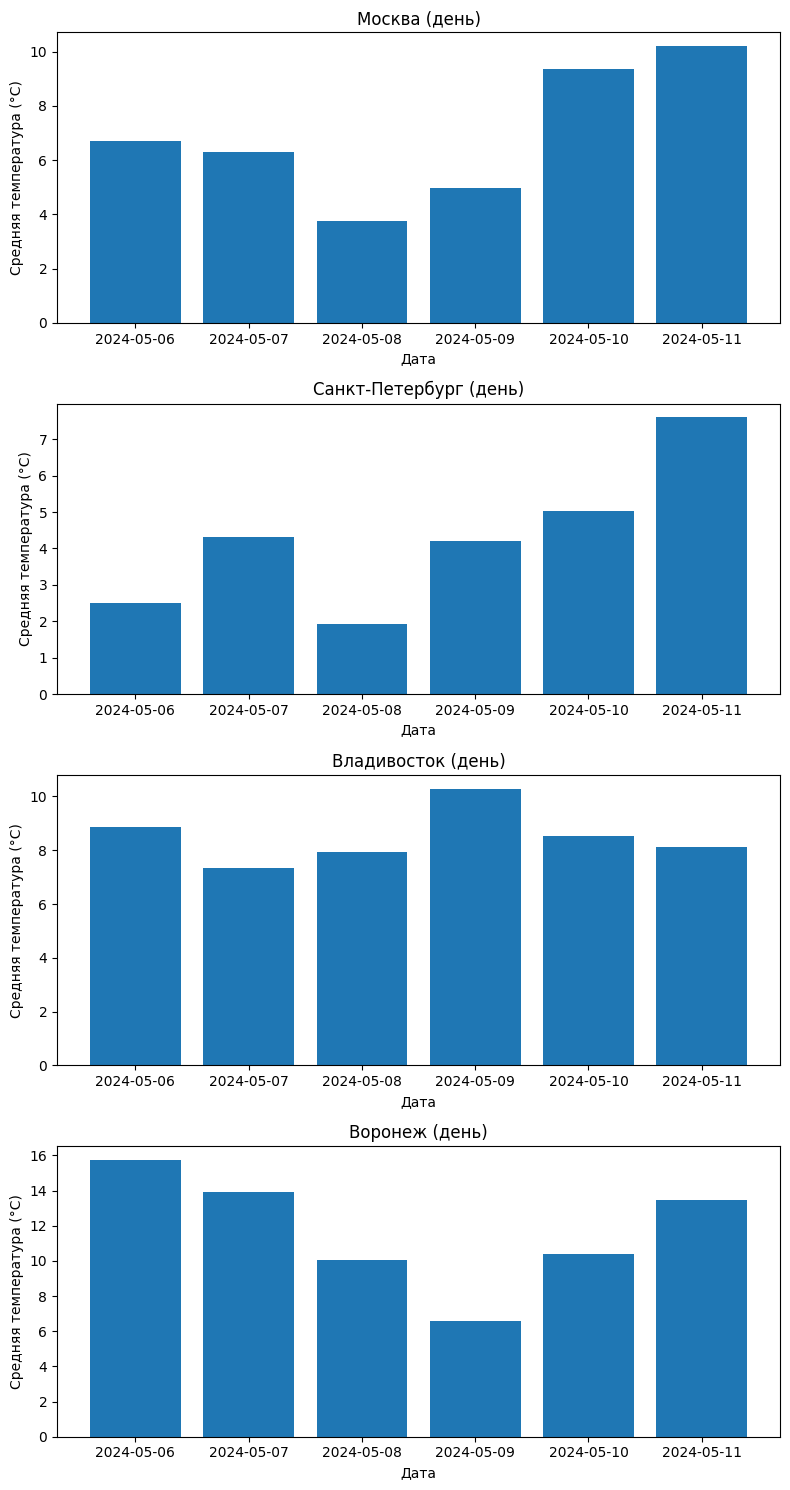

In [ ]:
moscow = df[df['city'] == 'Moscow']
moscow = moscow.drop(['city', 'country', 'description'], axis=1)
moscow = moscow.between_time('04:00', '23:00').resample(rule = 'D').mean()

saint_petersburg = df[df['city'] == 'Saint Petersburg']
saint_petersburg = saint_petersburg.drop(['city', 'country', 'description'], axis=1)
saint_petersburg = saint_petersburg.between_time('04:00', '23:00').resample(rule = 'D').mean()

vladivostok = df[df['city'] == 'Vladivostok']
vladivostok = vladivostok.drop(['city', 'country', 'description'], axis=1)
vladivostok = vladivostok.between_time('04:00', '23:00').resample(rule = 'D').mean()

voronezh = df[df['city'] == 'Voronezh']
voronezh = voronezh.drop(['city', 'country', 'description'], axis=1)
voronezh = voronezh.between_time('04:00', '23:00').resample(rule = 'D').mean()

fig, ax = plt.subplots(4, 1, figsize=(8, 15))

ax[0].bar(moscow.index, moscow.temperature)
ax[0].set_title('Москва (день)')
ax[0].set_xlabel('Дата')
ax[0].set_ylabel('Средняя температура (°C)')

ax[1].bar(saint_petersburg.index, saint_petersburg.temperature)
ax[1].set_title('Санкт-Петербург (день)')
ax[1].set_xlabel('Дата')
ax[1].set_ylabel('Средняя температура (°C)')

ax[2].bar(vladivostok.index, vladivostok.temperature)
ax[2].set_title('Владивосток (день)')
ax[2].set_xlabel('Дата')
ax[2].set_ylabel('Средняя температура (°C)')

ax[3].bar(voronezh.index, voronezh.temperature)
ax[3].set_title('Воронеж (день)')
ax[3].set_xlabel('Дата')
ax[3].set_ylabel('Средняя температура (°C)')

fig.tight_layout()
plt.show()

### Задание №6.2. Отобразите среднюю дневную (с 04:00 до 23:00) и ночную (с 23:00 до 04:00) температуру для каждого города (На одной плоскости должно быть четыре графика):

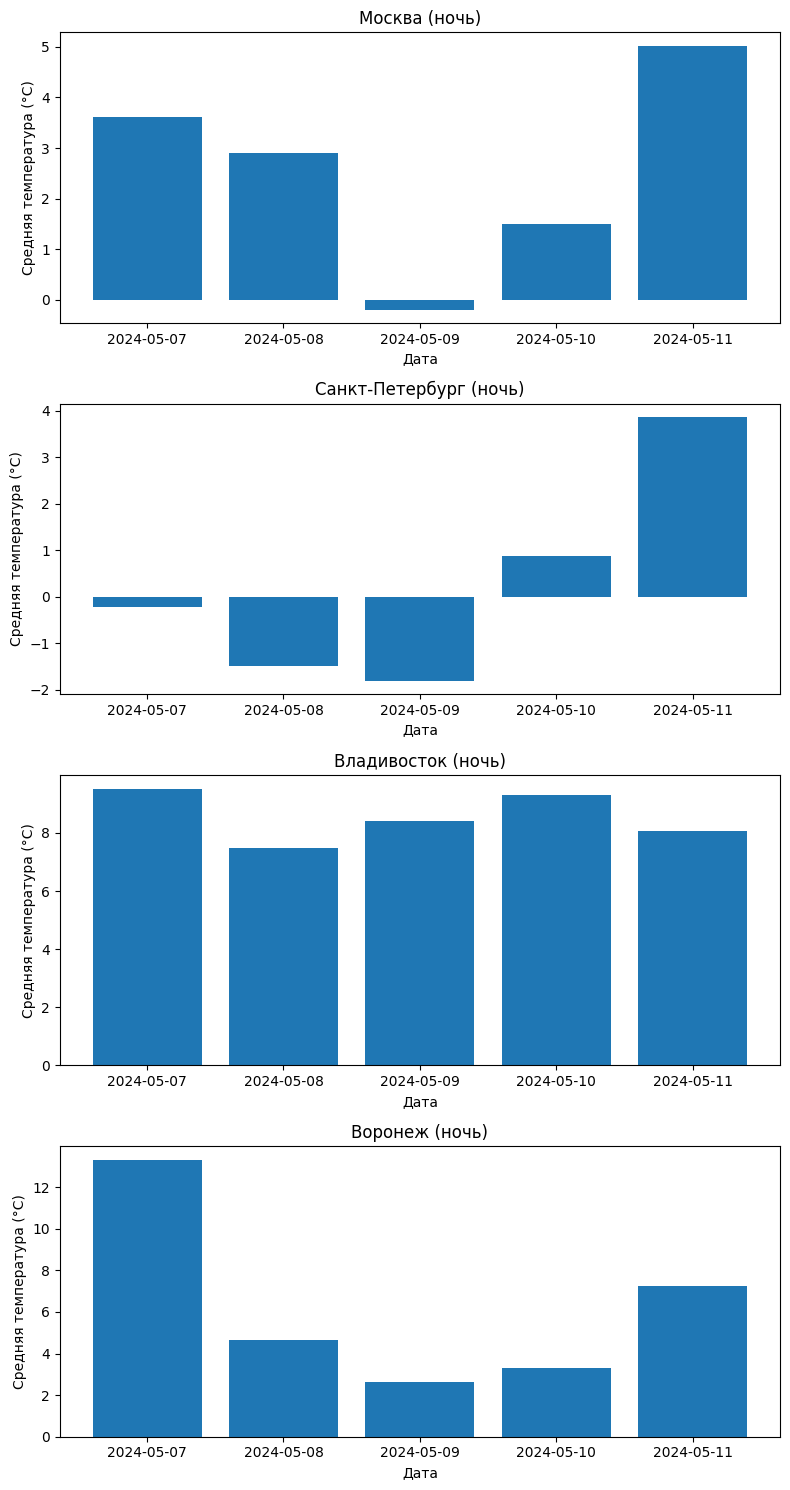

In [ ]:
moscow = df[df['city'] == 'Moscow']
moscow = moscow.drop(['city', 'country', 'description'], axis=1)
moscow = moscow.between_time('23:00', '04:00').resample(rule = 'D').mean()

saint_petersburg = df[df['city'] == 'Saint Petersburg']
saint_petersburg = saint_petersburg.drop(['city', 'country', 'description'], axis=1)
saint_petersburg = saint_petersburg.between_time('23:00', '04:00').resample(rule = 'D').mean()

vladivostok = df[df['city'] == 'Vladivostok']
vladivostok = vladivostok.drop(['city', 'country', 'description'], axis=1)
vladivostok = vladivostok.between_time('23:00', '04:00').resample(rule = 'D').mean()

voronezh = df[df['city'] == 'Voronezh']
voronezh = voronezh.drop(['city', 'country', 'description'], axis=1)
voronezh = voronezh.between_time('23:00', '04:00').resample(rule = 'D').mean()

fig, ax = plt.subplots(4, 1, figsize=(8, 15))

ax[0].bar(moscow.index, moscow.temperature)
ax[0].set_title('Москва (ночь)')
ax[0].set_xlabel('Дата')
ax[0].set_ylabel('Средняя температура (°C)')

ax[1].bar(saint_petersburg.index, saint_petersburg.temperature)
ax[1].set_title('Санкт-Петербург (ночь)')
ax[1].set_xlabel('Дата')
ax[1].set_ylabel('Средняя температура (°C)')

ax[2].bar(vladivostok.index, vladivostok.temperature)
ax[2].set_title('Владивосток (ночь)')
ax[2].set_xlabel('Дата')
ax[2].set_ylabel('Средняя температура (°C)')

ax[3].bar(voronezh.index, voronezh.temperature)
ax[3].set_title('Воронеж (ночь)')
ax[3].set_xlabel('Дата')
ax[3].set_ylabel('Средняя температура (°C)')

fig.tight_layout()
plt.show()

### Задание №7. Постройте точечный график зависимости температуры от влажности для каждого города (На одной плоскости должно быть четыре графика):

##### Пример визуализации по одному городу:

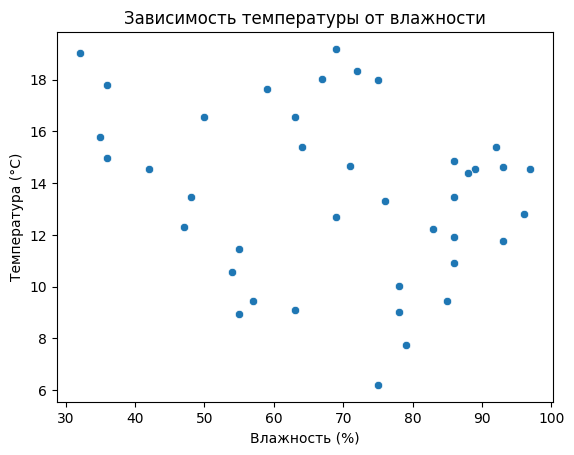

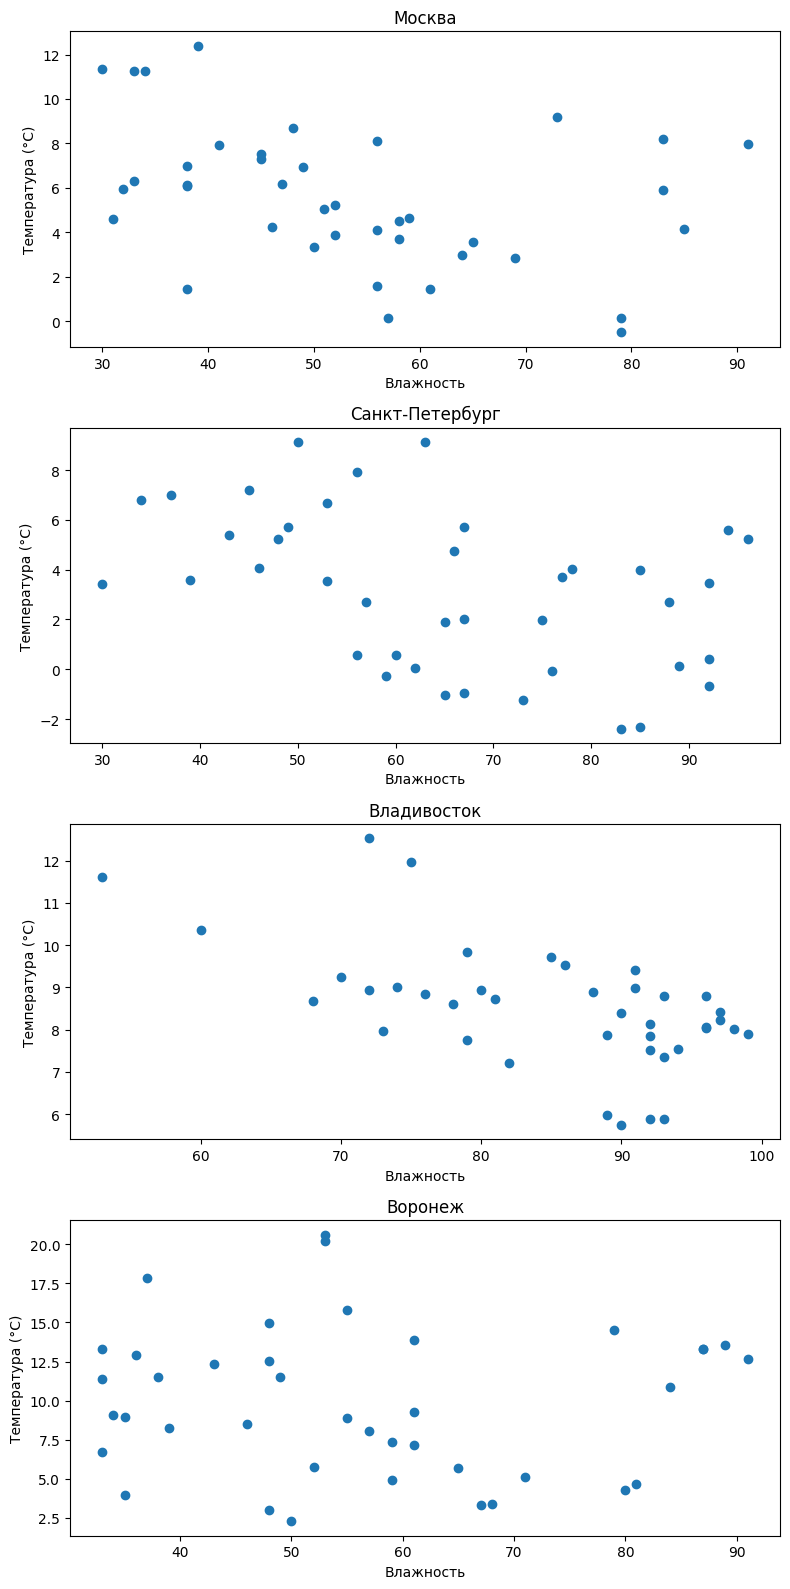

In [ ]:
moscow = df[df['city'] == 'Moscow']
saint_petersburg = df[df['city'] == 'Saint Petersburg']
vladivostok = df[df['city'] == 'Vladivostok']
voronezh = df[df['city'] == 'Voronezh']

fig, ax = plt.subplots(4, 1, figsize=(8, 16))

ax[0].scatter(moscow['humidity'], moscow['temperature'])
ax[0].set_title('Москва')
ax[0].set_xlabel('Влажность')
ax[0].set_ylabel('Температура (°C)')

ax[1].scatter(saint_petersburg['humidity'], saint_petersburg['temperature'])
ax[1].set_title('Санкт-Петербург')
ax[1].set_xlabel('Влажность')
ax[1].set_ylabel('Температура (°C)')

ax[2].scatter(vladivostok['humidity'], vladivostok['temperature'])
ax[2].set_title('Владивосток')
ax[2].set_xlabel('Влажность')
ax[2].set_ylabel('Температура (°C)')

ax[3].scatter(voronezh['humidity'], voronezh['temperature'])
ax[3].set_title('Воронеж')
ax[3].set_xlabel('Влажность')
ax[3].set_ylabel('Температура (°C)')

fig.tight_layout()
plt.show()

### Задание №8. Отобразите среднюю почасовую температуру для каждого города (На одной плоскости должно быть четыре графика):

##### Пример визуализации по одному городу:

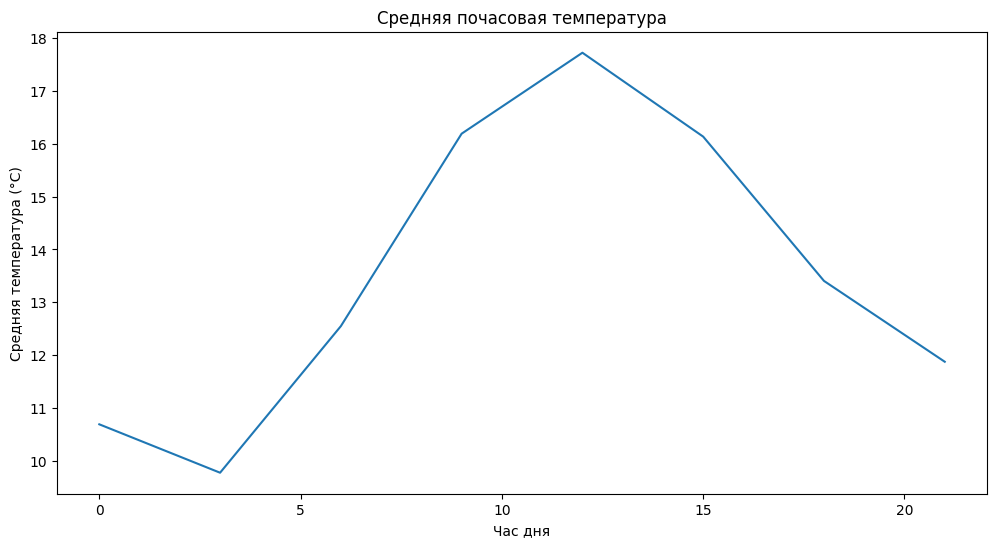

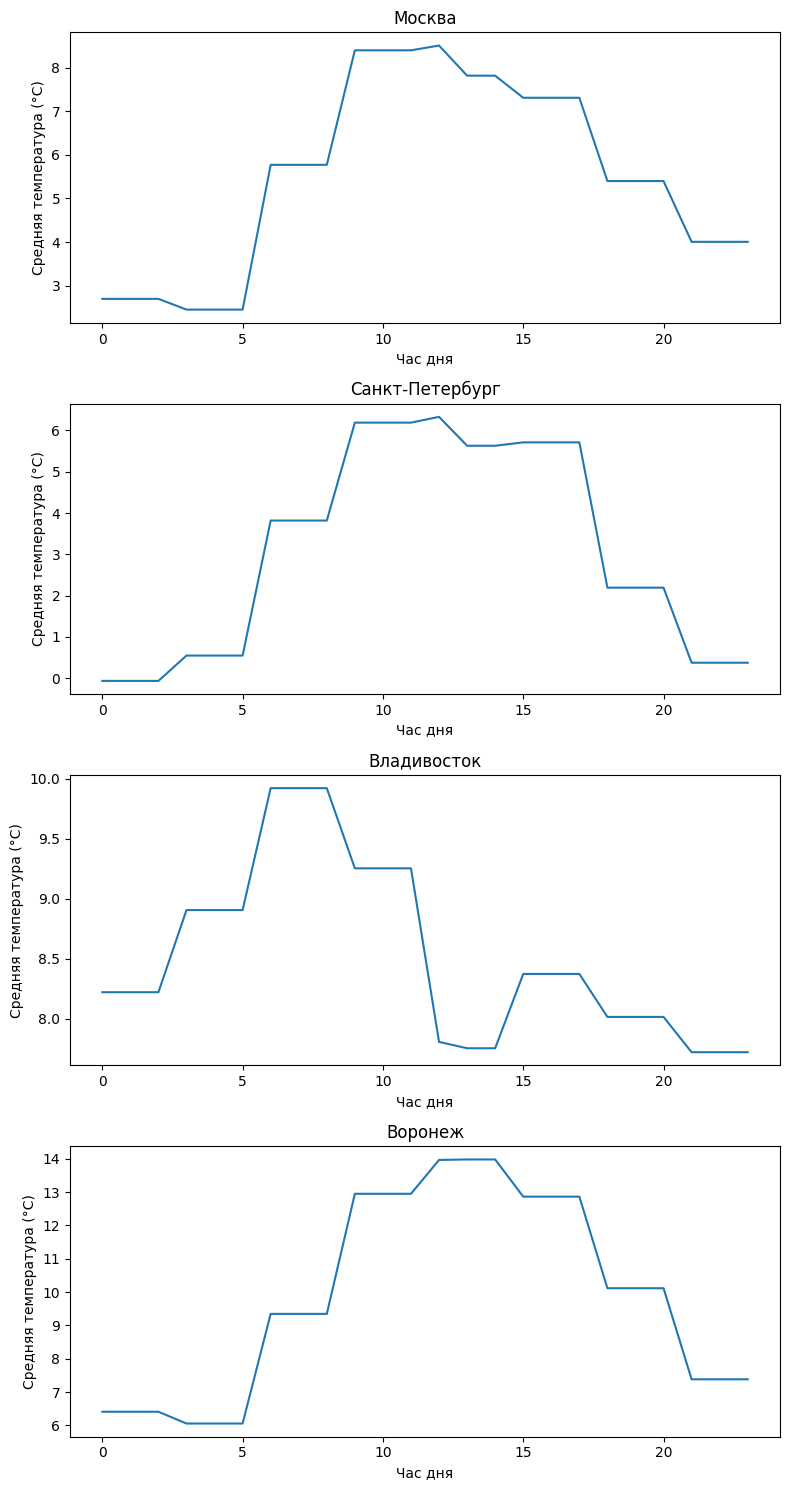

In [ ]:
moscow = df[df['city'] == 'Moscow']
moscow = moscow.drop(['city', 'country', 'description'], axis=1)
moscow = moscow.resample(rule = 'H').mean()
moscow['temperature'] = moscow['temperature'].ffill()
moscow_grouped = moscow.groupby([moscow.index.hour]).temperature.mean()

saint_petersburg = df[df['city'] == 'Saint Petersburg']
saint_petersburg = saint_petersburg.drop(['city', 'country', 'description'], axis=1)
saint_petersburg = saint_petersburg.resample(rule = 'H').mean()
saint_petersburg['temperature'] = saint_petersburg['temperature'].ffill()
saint_petersburg_grouped = saint_petersburg.groupby([saint_petersburg.index.hour]).temperature.mean()

vladivostok = df[df['city'] == 'Vladivostok']
vladivostok = vladivostok.drop(['city', 'country', 'description'], axis=1)
vladivostok = vladivostok.resample(rule = 'H').mean()
vladivostok['temperature'] = vladivostok['temperature'].ffill()
vladivostok_grouped = vladivostok.groupby([vladivostok.index.hour]).temperature.mean()

voronezh = df[df['city'] == 'Voronezh']
voronezh = voronezh.drop(['city', 'country', 'description'], axis=1)
voronezh = voronezh.resample(rule = 'H').mean()
voronezh['temperature'] = voronezh['temperature'].ffill()
voronezh_grouped = voronezh.groupby([voronezh.index.hour]).temperature.mean()

fig, ax = plt.subplots(4, 1, figsize=(8, 15))

ax[0].plot(moscow_grouped.index, moscow_grouped.values)
ax[0].set_title('Москва')
ax[0].set_xlabel('Час дня')
ax[0].set_ylabel('Средняя температура (°C)')

ax[1].plot(saint_petersburg_grouped.index, saint_petersburg_grouped.values)
ax[1].set_title('Санкт-Петербург')
ax[1].set_xlabel('Час дня')
ax[1].set_ylabel('Средняя температура (°C)')

ax[2].plot(vladivostok_grouped.index, vladivostok_grouped.values)
ax[2].set_title('Владивосток')
ax[2].set_xlabel('Час дня')
ax[2].set_ylabel('Средняя температура (°C)')

ax[3].plot(voronezh_grouped.index, voronezh_grouped.values)
ax[3].set_title('Воронеж')
ax[3].set_xlabel('Час дня')
ax[3].set_ylabel('Средняя температура (°C)')

fig.tight_layout()
plt.show()

# Блок 3. Прогнозирование

### Интегрируйте Вашу реализацию модели линейной регрессии из предыдущих работ:

In [ ]:
import numpy as np

class LinearRegression:
    def __init__(self):
        self.coefficients = None  # Параметры модели

    def fit(self, X, y):
        """
        Обучает модель линейной регрессии.

        X: numpy array, матрица признаков (наблюдения x признаки)
        y: numpy array, вектор целевых значений
        """

        # Добавляем столбец единиц к матрице признаков для учёта свободного члена
        X_with_intercept = np.insert(X, 0, 1, axis=1)

        try:
            # Вычисляем параметры модели с помощью псевдообратной матрицы
            self.coefficients = np.linalg.pinv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y
        except np.linalg.LinAlgError as e:
            self.coefficients = None
            print(f"Ошибка: {e}. Матрица сингулярна, обратной матрицы не существует.")

    def predict(self, X):
        """
        Предсказывает целевые значения на основе переданных признаков.

        X: numpy array, матрица признаков (наблюдения x признаки)
        """

        # Добавляем столбец единиц к матрице признаков для учёта свободного члена
        X_with_intercept = np.insert(X, 0, 1, axis=1)

        # Вычисляем предсказанные значения
        y_pred = X_with_intercept @ self.coefficients.T

        return y_pred

    def score(self, X, y):
        """
        Оценивает качество модели с помощью коэффициента детерминации (R^2).

        X: numpy array, матрица признаков (наблюдения x признаки)
        y: numpy array, вектор целевых значений
        """

        # Вычисляем предсказанные значения
        y_pred = self.predict(X)

        # Вычисляем среднее значение целевых переменных
        y_mean = np.mean(y)

        # Вычисляем суммы квадратов остатков и отклонений от среднего
        SSres = np.sum((y - y_pred) ** 2)
        SStot = np.sum((y - y_mean) ** 2)

        # Вычисляем коэффициент детерминации (R^2)
        R2 = 1 - (SSres / SStot)

        return R2


### Задание №1. Обучите модель регрессии предсказывать погоду на будущее (остальные признаки на будущее также вычисляются с помощью регрессии):

In [ ]:
import numpy as np

moscow = df[df['city'] == 'Moscow']
moscow = moscow.drop(['city', 'country', 'description'], axis=1)

# Преобразование индекса в массив NumPy и затем вычисление разницы во времени
X = (moscow.index - moscow.index[0]).total_seconds().to_numpy().reshape(-1, 1)
y = moscow['temperature']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
R2 = model.score(X, y)

print("Коэффициенты линейной регрессии:", model.coefficients)
print("Предсказанное значение:", y_pred)

Коэффициенты линейной регрессии: [3.97808537e+00 7.53995552e-06]
Предсказанное значение: [3.97808537 4.05951689 4.14094841 4.22237993 4.30381145 4.38524297
 4.46667449 4.548106   4.62953752 4.71096904 4.79240056 4.87383208
 4.9552636  5.03669512 5.11812664 5.19955816 5.28098968 5.3624212
 5.44385272 5.52528424 5.60671576 5.68814728 5.7695788  5.85101032
 5.93244184 6.01387336 6.09530488 6.1767364  6.25816792 6.33959944
 6.42103096 6.50246248 6.583894   6.66532552 6.74675704 6.82818855
 6.90962007 6.99105159 7.07248311 7.15391463]


Выведите оценку точности:

In [ ]:
print("R^2:", R2)

R^2: 0.09057500638958027


### Задание №2. Обучите модель регрессии предсказывать погоду на будущее, вспомогательные признаки для прогноза должны передаваться пользователем:

(Модель получает на вход признаки за предыдущие дни, затем значения признаков за будущие дни и возвращает погоду на будущие дни)

In [ ]:
class LinearRegression:
    def __init__(self):
        self.coefficients = None

    def fit(self, X, y):
        """
        Обучает модель линейной регрессии.

        X: numpy array, матрица признаков (наблюдения x признаки)
        y: numpy array, вектор целевых значений
        """

        X_with_intercept = np.insert(X, 0, 1, axis=1)

        try:
            self.coefficients = np.linalg.pinv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y
        except np.linalg.LinAlgError as e:
            self.coefficients = None
            print(f"Ошибка: {e}. Матрица сингулярна, обратной матрицы не существует.")

    def predict(self, X, X_future):
        """
        Предсказывает целевые значения на основе переданных признаков.

        X: numpy array, матрица признаков за предыдущие дни (наблюдения x признаки)
        X_future: numpy array, матрица признаков за будущие дни (наблюдения x признаки)
        """

        X_with_intercept = np.insert(X, 0, 1, axis=1)
        X_future_with_intercept = np.insert(X_future, 0, 1, axis=1)

        y_pred_future = X_future_with_intercept @ self.coefficients.T

        return y_pred_future

    def score(self, X, y):
        """
        Оценивает качество модели с помощью коэффициента детерминации (R^2).

        X: numpy array, матрица признаков (наблюдения x признаки)
        y: numpy array, вектор целевых значений
        """
        X_with_intercept = np.insert(X, 0, 1, axis=1)

        y_pred = X_with_intercept @ self.coefficients.T
        y_mean = np.mean(y)

        SSres = np.sum((y - y_pred) ** 2)
        SStot = np.sum((y - y_mean) ** 2)

        R2 = 1 - (SSres / SStot)

        return R2

In [ ]:
display(moscow)

X_previous = moscow[['humidity', 'temperature']].tail(6).to_numpy()
X_future = moscow[['humidity', 'temperature']].tail(6).to_numpy()
y_future = moscow['temperature'].head(6).to_numpy()

# Создание и обучение модели
model = LinearRegression()
model.fit(X_previous, y_future)

# Предсказание погоды на будущие часы
y_pred_future = model.predict(X_previous, X_future)

,city,country,latitude,longitude,temperature,humidity,description
datetime,,,,,,,
2024-05-06 15:00:00,Moscow,RU,55.750446,37.617494,8.71,48,overcast clouds
2024-05-06 18:00:00,Moscow,RU,55.750446,37.617494,6.92,49,overcast clouds
2024-05-06 21:00:00,Moscow,RU,55.750446,37.617494,4.49,58,overcast clouds
2024-05-07 00:00:00,Moscow,RU,55.750446,37.617494,3.69,58,overcast clouds
2024-05-07 03:00:00,Moscow,RU,55.750446,37.617494,3.55,65,overcast clouds
2024-05-07 06:00:00,Moscow,RU,55.750446,37.617494,4.66,59,light rain
2024-05-07 09:00:00,Moscow,RU,55.750446,37.617494,7.28,45,overcast clouds
2024-05-07 12:00:00,Moscow,RU,55.750446,37.617494,7.52,45,overcast clouds
2024-05-07 15:00:00,Moscow,RU,55.750446,37.617494,7.94,41,overcast clouds


Выведите оценку точности:

In [ ]:
R2 = model.score(X_previous, y_future)
print("R^2:", R2)

R^2: 0.9168318682444029


### Задание №3. Создайте новый датафрейм. Добавьте туда начальные значения температуры и предсказанные, а затем визуализируйте результаты на интерактивном таймфрейме по всем городам:

##### Пример визуализации:

In [ ]:
import plotly.express as px

# Фильтруем данные по каждому городу
moscow = df[df['city'] == 'Moscow']
saint_petersburg = df[df['city'] == 'Saint Petersburg']
vladivostok = df[df['city'] == 'Vladivostok']
voronezh = df[df['city'] == 'Voronezh']

# = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = =

# Задаем признаки за предыдущие дни для каждого города
X_previous_moscow = moscow[['humidity', 'temperature']].to_numpy()
X_previous_spb = saint_petersburg[['humidity', 'temperature']].to_numpy()
X_previous_vlad = vladivostok[['humidity', 'temperature']].to_numpy()
X_previous_vrn = voronezh[['humidity', 'temperature']].to_numpy()

# Задаем значения признаков за будущие дни для каждого города
X_future_moscow = moscow[['humidity', 'temperature']].to_numpy()
X_future_spb = saint_petersburg[['humidity', 'temperature']].to_numpy()
X_future_vlad = vladivostok[['humidity', 'temperature']].to_numpy()
X_future_vrn = voronezh[['humidity', 'temperature']].to_numpy()

# Задаем целевую переменную для будущих дней для каждого города
y_future_moscow = moscow['temperature'].to_numpy()
y_future_spb = saint_petersburg['temperature'].to_numpy()
y_future_vlad = vladivostok['temperature'].to_numpy()
y_future_vrn = voronezh['temperature'].to_numpy()

# = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = =

# Создание и обучение модели для каждого города
model_moscow = LinearRegression()
model_moscow.fit(X_previous_moscow, y_future_moscow)

model_spb = LinearRegression()
model_spb.fit(X_previous_spb, y_future_spb)

model_vlad = LinearRegression()
model_vlad.fit(X_previous_vlad, y_future_vlad)

model_vrn = LinearRegression()
model_vrn.fit(X_previous_vrn, y_future_vrn)

# = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = =

# Предсказание погоды на будущие часы для каждого города
y_pred_future_moscow = model_moscow.predict(X_previous_moscow, X_future_moscow)
y_pred_future_spb = model_spb.predict(X_previous_spb, X_future_spb)
y_pred_future_vlad = model_vlad.predict(X_previous_vlad, X_future_vlad)
y_pred_future_vrn = model_vrn.predict(X_previous_vrn, X_future_vrn)

# = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = =

# Москва
moscow_new = moscow.shift(moscow.shape[0], freq="3H", axis = 0, fill_value=0)
moscow_new['city'] = 'Moscow'
moscow_new['country'] = 'RU'
moscow_new['latitude'] = moscow['latitude'].to_numpy()[0]
moscow_new['longitude']= moscow['longitude'].to_numpy()[0]
moscow_new['temperature'] = y_pred_future_moscow

# Санкт-Петербург
saint_petersburg_new = saint_petersburg.shift(saint_petersburg.shape[0], freq="3H", axis = 0, fill_value=0)
saint_petersburg_new['city'] = 'Saint Petersburg'
saint_petersburg_new['country'] = 'RU'
saint_petersburg_new['latitude'] = saint_petersburg['latitude'].to_numpy()[0]
saint_petersburg_new['longitude'] = saint_petersburg['longitude'].to_numpy()[0]
saint_petersburg_new['temperature'] = y_pred_future_spb

# Владивосток
vladivostok_new = vladivostok.shift(vladivostok.shape[0], freq="3H", axis = 0, fill_value=0)
vladivostok_new['city'] = 'Vladivostok'
vladivostok_new['country'] = 'RU'
vladivostok_new['latitude'] = vladivostok['latitude'].to_numpy()[0]
vladivostok_new['longitude'] = vladivostok['longitude'].to_numpy()[0]
vladivostok_new['temperature'] = y_pred_future_vlad

# Воронеж
voronezh_new = voronezh.shift(voronezh.shape[0], freq="3H", axis = 0, fill_value=0)
voronezh_new['city'] = 'Voronezh'
voronezh_new['country'] = 'RU'
voronezh_new['latitude'] = voronezh['latitude'].to_numpy()[0]
voronezh_new['longitude'] = voronezh['longitude'].to_numpy()[0]
voronezh_new['temperature'] = y_pred_future_vrn

# = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = =

result_df = pd.concat([moscow,
                       moscow_new,
                       saint_petersburg,
                       saint_petersburg_new,
                       vladivostok,
                       vladivostok_new,
                       voronezh,
                       voronezh_new
                       ])

# = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = =

fig = px.scatter_mapbox(result_df,
                        lat="latitude",
                        lon="longitude",
                        color="temperature",
                        size="humidity",
                        hover_name="city",
                        hover_data="description",
                        animation_frame=result_df.index.strftime('%Y-%m-%d %H:%M:%S'),
                        zoom=3,
                        mapbox_style="carto-positron",
                        height=600,
                        title="Прогноз температуры в разных городах")
fig.update_layout(
    title={
        'text': "Прогноз температуры в разных городах",
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="Широта",
    yaxis_title="Долгота",
)
fig.show()


## Задание №4. Выберите несколько стран, получите прогноз погоды по каждой их них, после чего сформируйте предскзания погоды на будущее и отобразите её в виде таймфрейма, используя px.choropleth() (тематическая карта)

#### Пример использования px.choropleth()

Этот код используется для создания тематической (хороплетной) карты.

* `px.choropleth()` - это функция, которая создает хороплетную карту. В данном случае, она принимает следующие аргументы:

- `gapminder` - набор данных, который будет использоваться для построения карты.
- `locations="iso_alpha"` - указывает на столбец данных, который будет использоваться для определения местоположений на карте. В данном случае, значения из столбца `iso_alpha` будут использоваться для определения местоположений.
- `color="lifeExp"` - указывает на столбец данных, который будет определять цвета на карте. В данном случае, значения из столбца `lifeExp` будут использоваться для определения цвета.
- `hover_name="country"` - указывает на столбец данных, который будет отображаться при наведении на местоположение на карте. В данном случае, значения из столбца `country` будут отображаться при наведении.
- `animation_frame="year"` - указывает на столбец данных, который будет использоваться для создания анимации на карте. В данном случае, значения из столбца `year` будут использоваться для создания анимации, показывая изменения со временем.
- `color_continuous_scale=px.colors.sequential.Plasma` - указывает на цветовую палитру, которая будет использоваться для отображения данных на карте. В данном случае, используется палитра Plasma из библиотеки Plotly Express.
- `projection="natural earth"` - указывает на проекцию карты. В данном случае, используется глобальная проекция карты "natural earth".

В итоге, данный код создаст тематическую (хороплетную) карту, на которой каждое местоположение будет отображаться цветом, соответствующим значению из столбца `lifeExp`. При наведении на каждое местоположение будет отображаться страна из столбца `country`. Карта будет анимированной, показывая изменения со временем, используя значения из столбца `year`. Цвета на карте будут использовать цветовую палитру Plasma, а проекция карты будет глобальной "natural earth".

In [ ]:
px.choropleth(
  gapminder, # набор данных
  locations="iso_alpha", # отображение с помощью цвета color
  color="lifeExp", # выбор поля для цвета
  hover_name="country", # hover_field_name
  animation_frame="year", # аннотация
  color_continuous_scale=px.colors.sequential.Plasma, # изменение цвета
  projection="natural earth" # параметр проекции: глобальная карта
             )

In [ ]:
countries = ['USA', 'Germany', 'France', 'China']

data = []

for country in countries:
    link = f"https://api.openweathermap.org/data/2.5/forecast?q={country}&appid={API_KEY}"

    response_data = requests.get(link).json

    for entry in forecast_data:
        data.append({
            "country": country,
            "datetime": entry['dt_txt'],
            "temperature": entry['main']['temp'] - 273.15,
            "feels_like": entry['main']['feels_like'] - 273.15,
            "pressure": entry['main']['pressure'],
            "sea_level": entry['main']['sea_level'],
            "grnd_level": entry['main']['grnd_level'],
            "humidity": entry['main']['humidity'],
        })

weather_data = pd.DataFrame(data)
weather_data.set_index('datetime', inplace = True)
weather_data.index = pd.to_datetime(weather_data.index)

display(weather_data)

,country,temperature,feels_like,pressure,sea_level,grnd_level,humidity
datetime,,,,,,,
2024-05-06 15:00:00,USA,17.84,16.65,1009,1009,993,37
2024-05-06 18:00:00,USA,15.82,14.89,1008,1008,992,55
2024-05-06 21:00:00,USA,13.53,13.26,1007,1007,992,89
2024-05-07 00:00:00,USA,13.28,12.94,1006,1006,991,87
2024-05-07 03:00:00,USA,13.33,12.99,1006,1006,991,87
...,...,...,...,...,...,...,...
2024-05-11 00:00:00,China,7.36,4.56,1019,1019,1003,59
2024-05-11 03:00:00,China,7.13,4.27,1017,1017,1002,61
2024-05-11 06:00:00,China,11.49,9.97,1016,1016,1000,49


In [ ]:
usa = weather_data[weather_data['country'] == 'USA']
germany = weather_data[weather_data['country'] == 'Germany']
france = weather_data[weather_data['country'] == 'France']
china = weather_data[weather_data['country'] == 'China']

# = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = =

# USA
usa_x_previous = usa[['humidity', 'temperature']].to_numpy()
usa_x_future = usa[['humidity', 'temperature']].to_numpy()
usa_y_future = usa['temperature'].to_numpy()

# Germany
germany_x_previous = germany[['humidity', 'temperature']].to_numpy()
germany_x_future = germany[['humidity', 'temperature']].to_numpy()
germany_y_future = germany['temperature'].to_numpy()

# France
france_x_previous = france[['humidity', 'temperature']].to_numpy()
france_x_future = france[['humidity', 'temperature']].to_numpy()
france_y_future = france['temperature'].to_numpy()

# China
china_x_previous = china[['humidity', 'temperature']].to_numpy()
china_x_future = china[['humidity', 'temperature']].to_numpy()
china_y_future = china['temperature'].to_numpy()

# = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = =

# Создание и обучение модели для каждой страны
usa_model = LinearRegression()
usa_model.fit(usa_x_previous, usa_y_future)
usa_y_pred_future = usa_model.predict(usa_x_previous, usa_x_future)

germany_model = LinearRegression()
germany_model.fit(germany_x_previous, germany_y_future)
germany_y_pred_future = model_spb.predict(germany_x_previous, germany_x_future)

france_model = LinearRegression()
france_model.fit(france_x_previous, france_y_future)
france_y_pred_future = model_vlad.predict(france_x_previous, france_x_future)

china_model = LinearRegression()
china_model.fit(china_x_previous, china_y_future)
china_y_pred_future = model_vrn.predict(china_x_previous, china_x_future)

# = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = =

# USA
usa_new = usa.shift(periods=usa.shape[0], freq="3H", axis = 0, fill_value=0)
usa_new['country'] = 'USA'
usa_new['temperature'] = usa_y_pred_future

# Germany
germany_new = germany.shift(germany.shape[0], freq="3H", axis = 0, fill_value=0)
germany_new['country'] = 'Germany'
germany_new['temperature'] = germany_y_pred_future

# France
france_new = france.shift(france.shape[0], freq="3H", axis = 0, fill_value=0)
france_new['country'] = 'France'
france_new['temperature'] = france_y_pred_future

# China
china_new = china.shift(china.shape[0], freq="3H", axis = 0, fill_value=0)
china_new['country'] = 'China'
china_new['temperature'] = china_y_pred_future

# = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = =

result_df = pd.concat([usa, usa_new, germany, germany_new, france, france_new, china, china_new])

px.choropleth(
  result_df, # набор данных
  locations="country", # отображение с помощью цвета color
  color="temperature", # выбор поля для цвета
  hover_name="country", # hover_field_name
  animation_frame=result_df.index, # аннотация
  color_continuous_scale=px.colors.sequential.Plasma, # изменение цвета
  projection="natural earth" # параметр проекции: глобальная карта
             )

# Блок №4. Модели прогнозирования семейства ARIMA

## Задание №1. Ознакомьтесь с теоритическим материалом и примерами по ссылке ниже:

### Ссылка: https://colab.research.google.com/drive/1WsEyJxvQ52W5nB3XN7HEfeHI8sgDPDMr?usp=sharing

## Задание №2. Сформируйте прогноз погоды на будущее, используя одну из моделей семейства ARIMA и визуализируйте таймфрейм

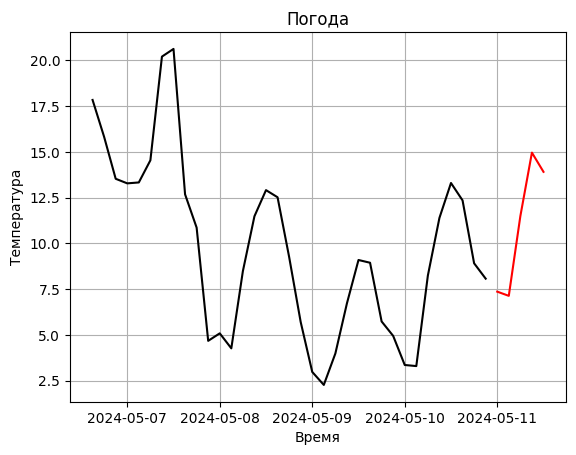

In [ ]:
train = usa[:'2024-05-10']
test = usa['2024-05-11':]

plt.plot(train.index, train['temperature'], color = "black")
plt.plot(test.index, test['temperature'], color = "red")
plt.title('Погода')
plt.ylabel('Температура')
plt.xlabel('Время')
plt.grid()

plt.show()

In [ ]:
import warnings
from pmdarima import auto_arima

warnings.filterwarnings("ignore")

# Поиск параметров на обучающей выборке
parameter_search = auto_arima(train['temperature'], start_p = 1, start_q = 1, max_p = 3, max_q = 3, m = 12, start_P = 0, seasonal = True,
                         d = None, D = 1, trace = True, error_action ='ignore', suppress_warnings = True,  stepwise = True)           #

print(parameter_search.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=162.133, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=135.605, Time=0.12 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=163.153, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=144.893, Time=0.04 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=0.97 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.11 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=151.142, Time=0.08 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=131.026, Time=0.16 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=130.216, Time=0.15 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=130.874, Time=0.33 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.10

In [ ]:
import warnings
warnings.simplefilter(action = 'ignore', category = Warning)

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['temperature'],
                order = (2, 0, 0),
                seasonal_order = (0, 1, 0, 12))

result = model.fit()

In [ ]:
start = len(train)
end = len(train) + len(test) - 1

predictions = result.predict(start, end)
predictions

2024-05-11 00:00:00    7.499571
2024-05-11 03:00:00    5.827348
2024-05-11 06:00:00    2.586601
2024-05-11 09:00:00    2.815000
2024-05-11 12:00:00    2.637363
Freq: 3H, Name: predicted_mean, dtype: float64

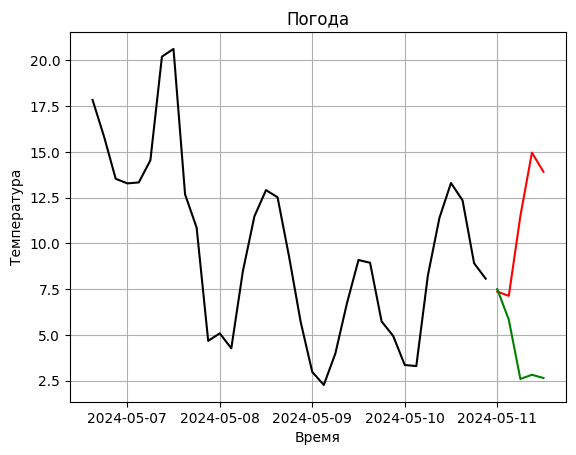

In [ ]:
plt.plot(train.index, train['temperature'], color = "black")
plt.plot(test.index, test['temperature'], color = "red")
plt.plot(predictions, color = 'green')
plt.title('Погода')
plt.ylabel('Температура')
plt.xlabel('Время')
plt.grid()

plt.show()

In [ ]:
start = len(train)
end = (len(train) - 1) + 3 * 12

forecast = result.predict(start, end)
forecast[-12:]

2024-05-14 00:00:00     6.953647
2024-05-14 03:00:00     5.441604
2024-05-14 06:00:00     2.440042
2024-05-14 09:00:00     2.883539
2024-05-14 12:00:00     2.833069
2024-05-14 15:00:00     4.016515
2024-05-14 18:00:00     9.592384
2024-05-14 21:00:00    12.731008
2024-05-15 00:00:00    14.189487
2024-05-15 03:00:00    12.630716
2024-05-15 06:00:00     8.673782
2024-05-15 09:00:00     7.551821
Freq: 3H, Name: predicted_mean, dtype: float64

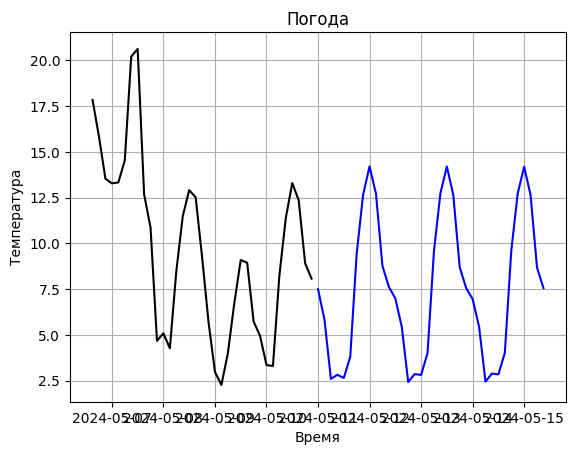

In [ ]:
plt.plot(train.index, train['temperature'], color = 'black')
plt.plot(forecast, color = 'blue')
plt.title('Погода')
plt.ylabel('Температура')
plt.xlabel('Время')
plt.grid()

plt.show()